

## **Project 1 - Fundamental of AI & ML**

### **Title**: *EDA on Cardio Good Fitness data*

### **Author**: *Pankaj Singh*

<br>

**Domain** : Customer analytics

**Data Description** : The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness.

**Attribute Information** 

- **`Product`** : The model no. of the treadmill <br>
- **`Age`** : Age of the customer in no of years <br>
- **`Gender`** : Gender of the customer <br>
- **`Education`** : Education of the customer in no. of years <br>
- **`Marital Status`** : Marital status of the customer <br>
- **`Usage`** : Avg. # times the customer wants to use the treadmill every week <br>
- **`Fitness`** : Self rated fitness score of the customer (5 - very fit, 1 - very unfit) <br>
- **`Income`** : Income of the customer <br>
- **`Miles`** : Miles that a customer expects to run <br>

**Project Objective**

- Explore the dataset to identify differences between the customers of each product. 
- Explore relationships between the different attributes of the customers. 
- Propose any other line of questioning that could be relevant for the business.

**Project Deliverables**

- Coming up with a customer profile (characteristics of a customer) of the different products
- Perform univariate and multivariate analyses
- Generate a set of insights and recommendations that will help the company in targeting new customers.

**Learning Objective**
- Exploratory Data Analysis
- Expand the knowledge of NumPy, Pandas and Seaborn

### **Import Libraries**

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, warnings
sns.set_style('whitegrid')
sns.set_context('poster')

warnings.filterwarnings('ignore')

### **Load data**

In [2]:
cardio = pd.read_csv('CardioGoodFitness.csv')

### **Data Statistics**


- #### Shape of the data

In [3]:
## Print out the shape of data
cardio.shape

(180, 9)

> The dataset has 180 observations and 9 columns

- #### A peek at the first 5 rows of the dataset

In [4]:
## Print out the first 5 rows of the data
cardio.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


- #### Check the data types in each columns

In [5]:
## Print out the data tyoe of each attribute
cardio.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

> - Numeric attributes: `Age`, `Education`, `Usage`, `Fitness`, `Income`, `Miles`
> - Object attributes: `Product`, `Gender`, `MaritalStatus`
>
> NOTE: Even though `Fitness` appears in numerical attributes, but due to its discrete nature in finite range it can be considered categorical

- **Check if there is any null data**

In [6]:
# Checking the presence of missing values
cardio.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

> The dataset has no null values.

> The 4 categorical columns (including `Fitness`) have following unique values:
> - `Product` has 3 unique values
> - `Gender` has 2 unique values
> - `MaritalStatus` has 2 unique values
> - `Fitness` has 5 unique vlaues

### **Univariate Analysis**

- **Describe the numerical data**

In [7]:
# get simple statistical information of numerical data
cardio.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


- **Visualize the distributions of the numerical columns**

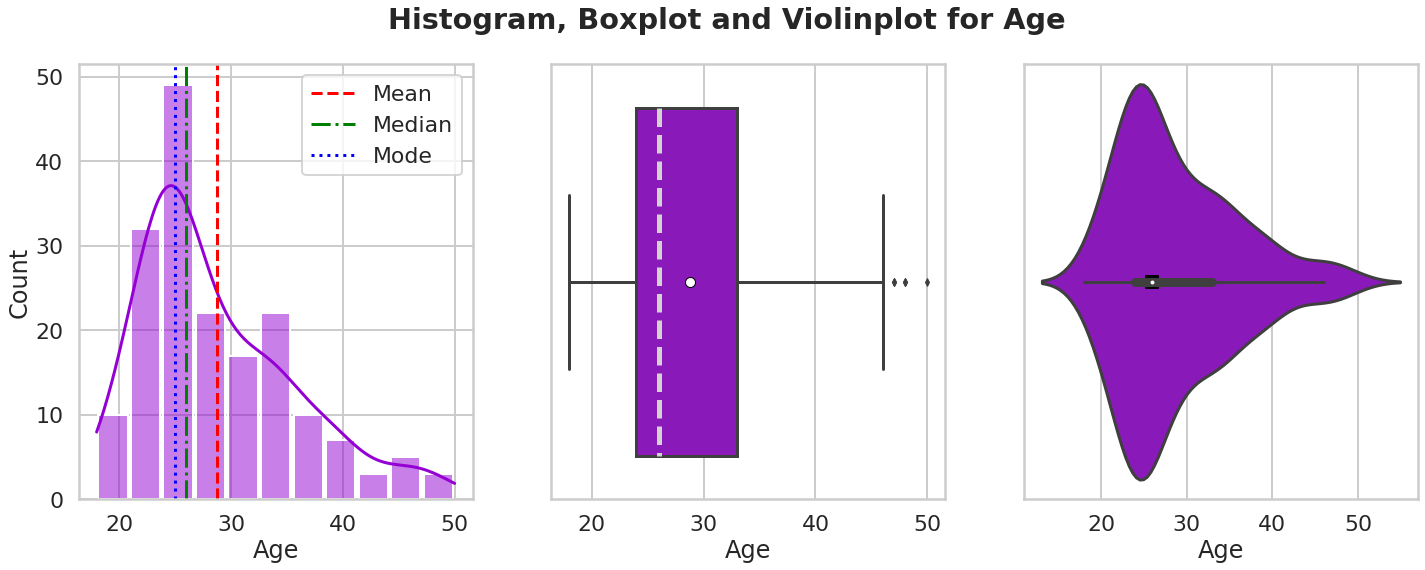

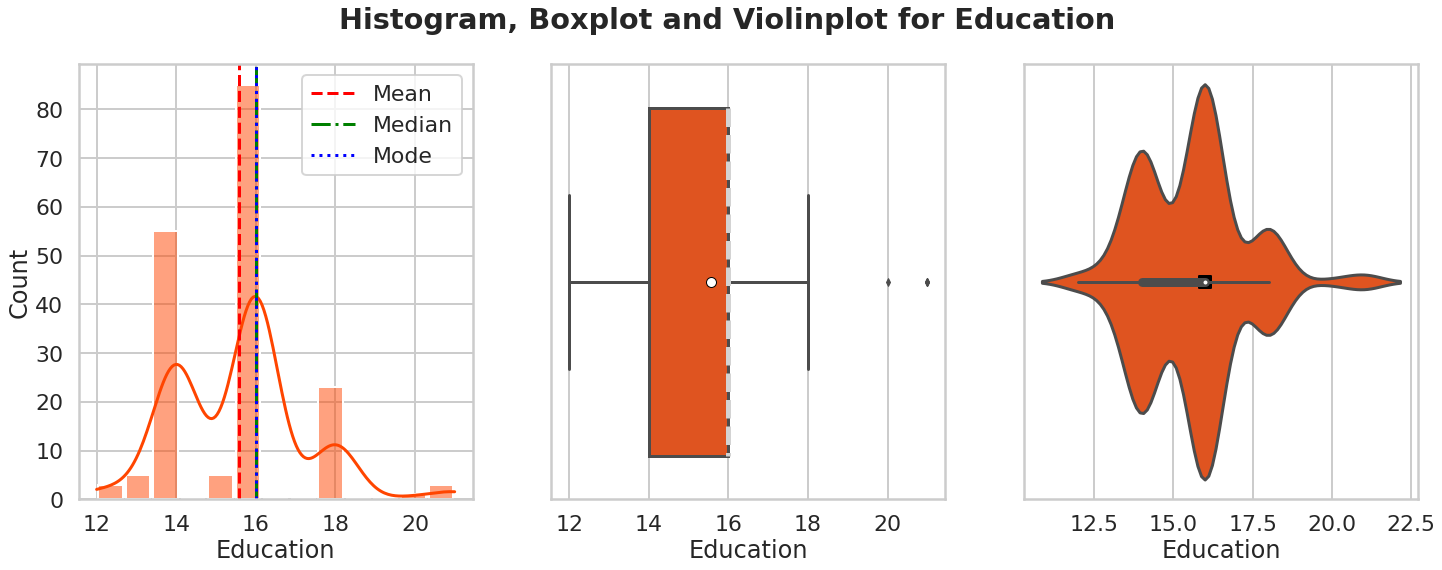

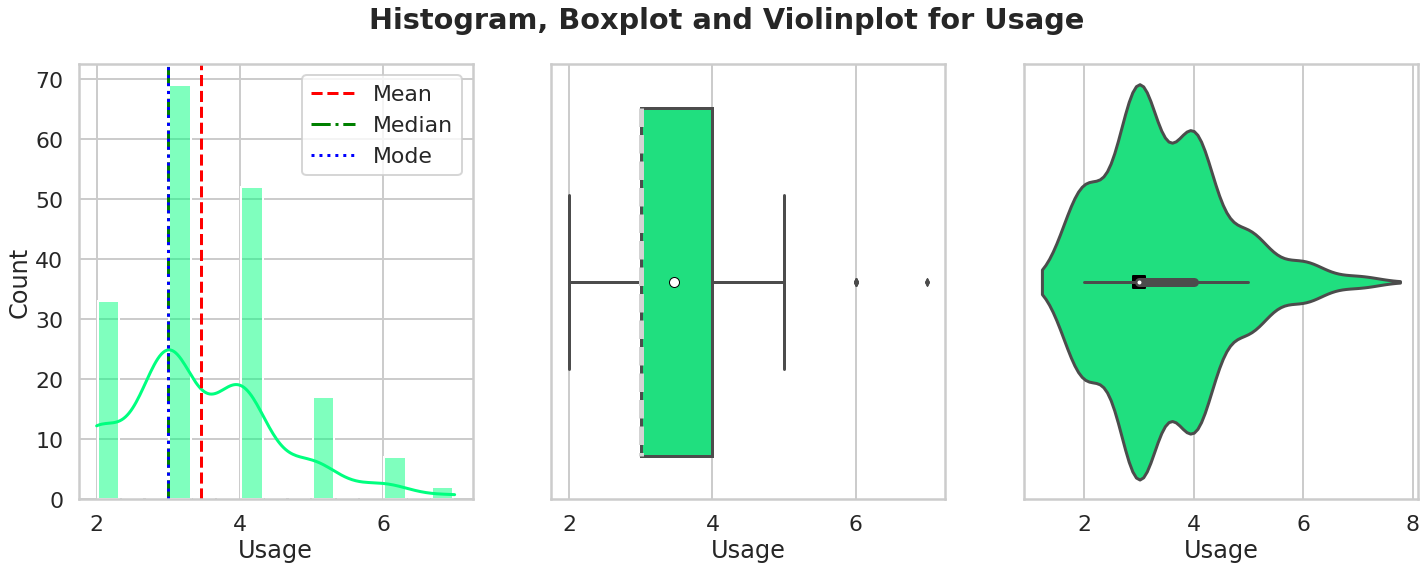

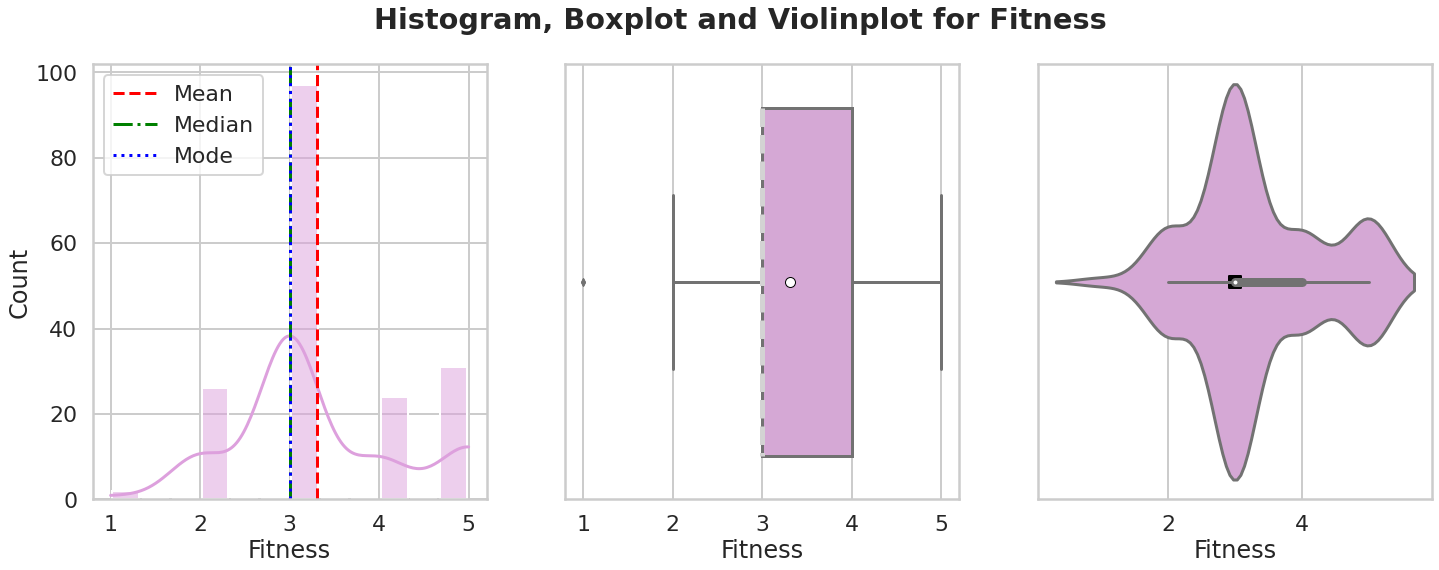

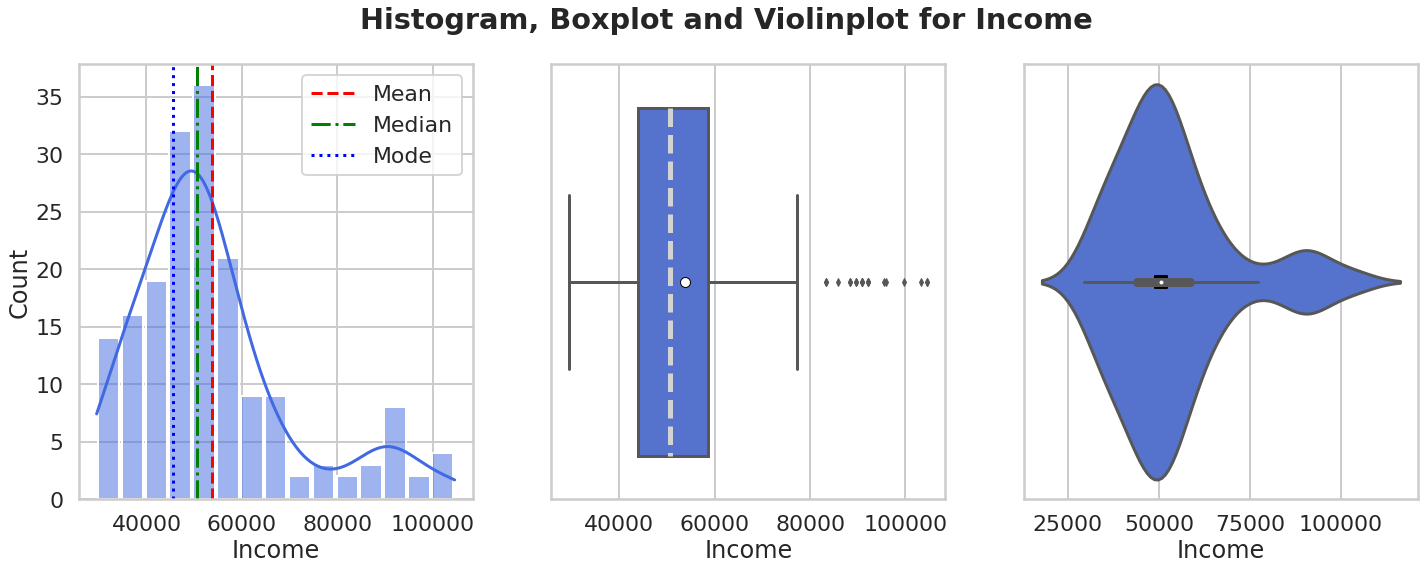

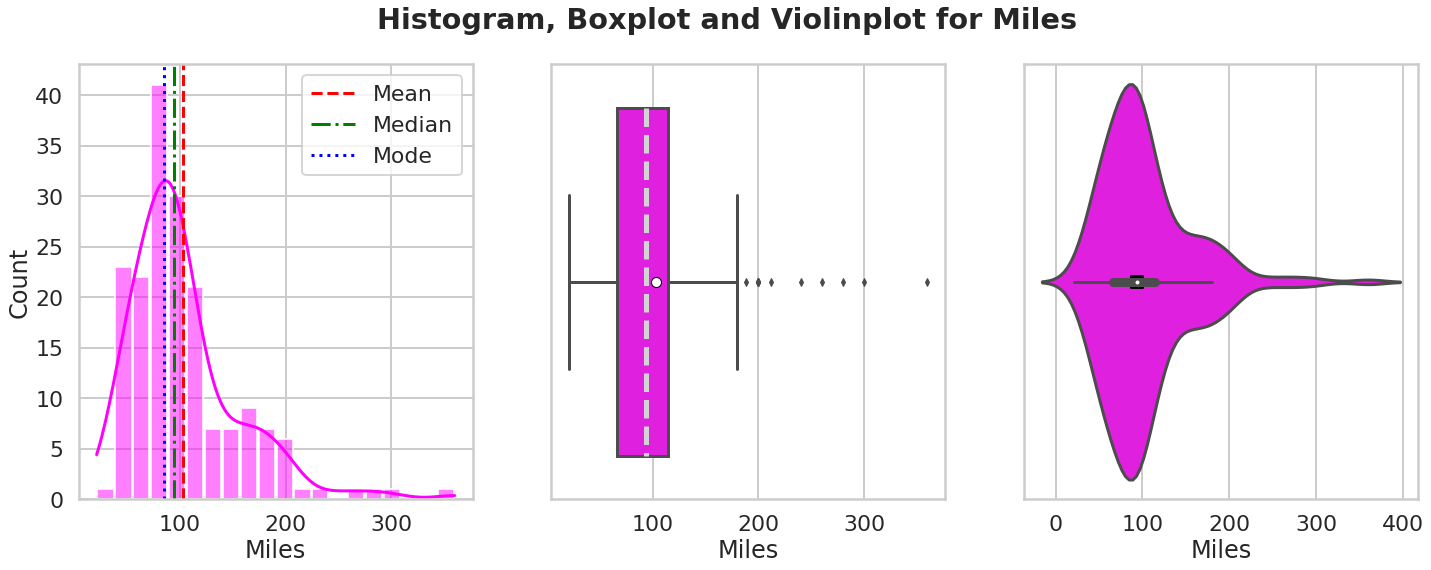

In [8]:
# a function to show 3 different kinds of univariate distribution plots
# 1. Histograms, with kernel density estimation along with mean, median and mode
# 2. Box plots along with mean
# 3. Violin plots

def plot_bar_box_violin(x,color):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,8))
    
    seriesname = x.name
    plt.suptitle(f'Histogram, Boxplot and Violinplot for {seriesname}', fontweight='heavy')
    
    # Plot # 1
    sns.histplot(x, ax=ax[0], kde=True, shrink=0.9,color=color)
    ax[0].axvline(x.mean(), color = 'r', linestyle = '--', label = 'Mean')    
    ax[0].axvline(x.median(), color = 'g', linestyle = '-.', label = 'Median')
    ax[0].axvline(x.mode()[0], color = 'b', linestyle = 'dotted', label = 'Mode')
    ax[0].legend(frameon=True)
    
    # Plot # 2
    sns.boxplot(x, ax=ax[1], showmeans=True,color=color,
                meanprops=dict(marker='o',markerfacecolor='white',markeredgecolor='k',markersize=10),
                medianprops=dict(color='lightgray',linestyle='--', linewidth=5))
    
    # Plot # 3
    sns.violinplot(x, showmeans=True, ax=ax[2],color=color)
    ax[2].scatter(x.median(), 0,c='k',marker='s')

# Univariate analysis for the AGE
plot_bar_box_violin(cardio['Age'],'darkviolet')
# Univariate analysis for the EDUCATION
plot_bar_box_violin(cardio['Education'],'orangered')
# Univariate analysis for the USAGE
plot_bar_box_violin(cardio['Usage'],'springgreen')
# Univariate analysis for the FITNESS
plot_bar_box_violin(cardio['Fitness'],'plum')
# Univariate analysis for the INCOME
plot_bar_box_violin(cardio['Income'],'royalblue')
# Univariate analysis for the MILES
plot_bar_box_violin(cardio['Miles'],'fuchsia')

> **Observations**

> - The `Age` of customers is between 18 and 50 years
>   - The median customer age is \~26 years and is less than the mean age (\~29 years). Hence distribution is right skewed
>   - There are few outliers beyond age 45


> - The customer `Education` years is between 12 and 21
>   - The median education years is \~16 years and the mean education years is \~15.5 years
>   - There are few outliers who have more than 18 years of education

> - The weekly treadmill `Usage` is between 2 to 7 times
>   - The median weekly usage is 3 times and is less than the mean weekly usage (\~3.5 times). Hence distribution is right skewed
>   - Majority usage is 3 to 4 times a week, with few outliers who are using it 6-7 times a week

> - The `Fitness` levels of customers is between 1 to 5
>   - The median fitness level is 3 and the mean fitness is \~3.3
>   - The average customer believes that they are decently fit

> - The customer `Income` is between \~30000 to \~100,000
>   - The median income is \~50,000 and is less than the mean income (\~54,000), making this distribution right skewed
>   - There are quite a few outliers making more than 80,000 a year

> - The `Miles` expected to run by customers is between 21 to 360 mi
>   - The median expected miles is 94 mi and is less than the mean expected miles (\~103.2 times), making the distirbution right skewed
>   - Average customer expects to run \~100 mi 
>   - There are quite a few outliers who plan to run more than 200 mi

- **Print out the unique values of categorical data**

In [14]:
# List the unique values under each categorical variables and their counts

# unique values and number of values under it for PRODUCT
print(cardio['Product'].value_counts(),'\n\n')
# unique values and number of values under it for GENDER
print(cardio['Gender'].value_counts(),'\n\n')
# unique values and number of values under it for MARITALSTATUS
print(cardio['MaritalStatus'].value_counts(),'\n\n')
# unique values and number of values under it for FITNESS
print(cardio['Fitness'].value_counts())

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64 


Male      104
Female     76
Name: Gender, dtype: int64 


Partnered    107
Single        73
Name: MaritalStatus, dtype: int64 


3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64


- **Count and proportions in categorical data**

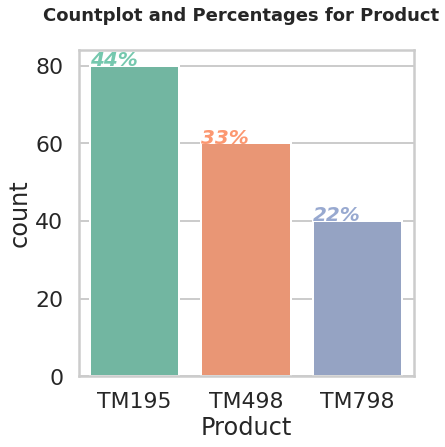

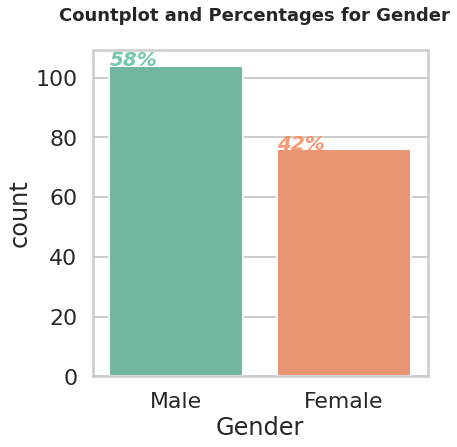

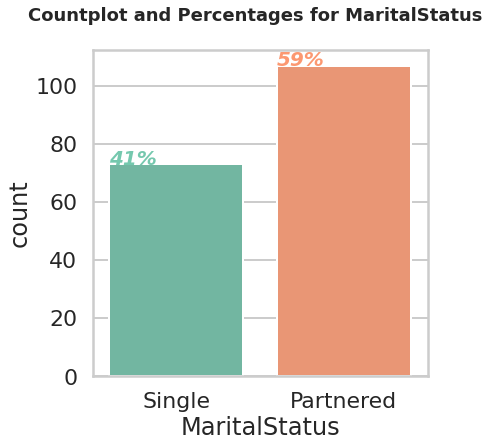

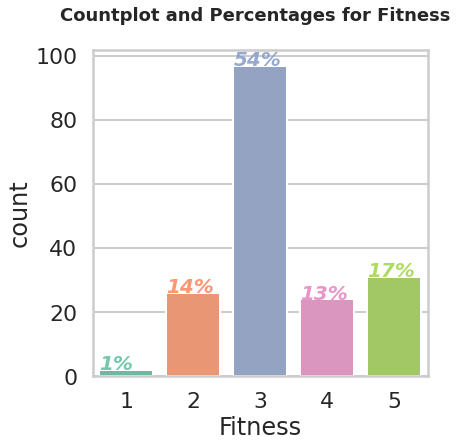

In [15]:
# A function to show the countplots for each categorical variable 
# along with the %age proportion under each unique values
def plot_count(x):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
    
    seriesname = x.name
    plt.suptitle(f'Countplot and Percentages for {seriesname}', fontweight='heavy', fontsize=18)
    
    # Plot the countplot
    sns.countplot(x, ax=ax, palette='Set2')
    
    # inserting %ages above bars courtsey of StackOverflow
    # (https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn)
    
    # Display the %age of the unique value of the categorical variables
    total = len(x)
    colors = sns.color_palette('Set2')[:x.nunique()]
    for i,p in enumerate(ax.patches):
        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        xcoord = p.get_x() + p.get_width()*0
        ycoord = p.get_y() + p.get_height()
        ax.annotate(percentage, (xcoord, ycoord), size = 20, 
                    **dict(alpha=0.9), color = colors[i], 
                    fontweight='bold', fontstyle='italic')

# count and proportion of unique PRODUCTS
plot_count(cardio['Product'])
# count and proportion of unique GENDER
plot_count(cardio['Gender'])
# count and proportion of unique MARITALSTATUS
plot_count(cardio['MaritalStatus'])
# count and proportion of unique FITNESS
plot_count(cardio['Fitness'])

> **Observations**

> - There are 3 different `Products` being sold
>   - Those are *TM195*, *TM498* and *TM798* in the order of portion of total treadmill sales

> - From `Gender` perspective, majority customer have been *male*

> - The majority `MaritalStatus` of the customer is *partenered*

> - The majority customers rate themselves at `Fitness` level of *3 out of 5*

### **Multivariate Analysis**

As part of this section I will be focussing on product centered multivariate analysis, since that is the deliverable. So further analysis I will be obtaining customer characterstics for each product.

- **Bivariate analysis of Product with other categorical variables**

In [18]:
# using pandas crosstab and apply function to find proportion & count of customers for each PRODUCT 
# under unique categorical values

# Show the count and proportion of customers within each GENDER for all the PRODUCTS
print('Gender specific count and percentages of customers for each product\n')
print(pd.crosstab(index=cardio['Product'], columns=cardio['Gender']),'\n')
print(pd.crosstab(index=cardio['Product'], columns=cardio['Gender']).apply(lambda r: 100*r/r.sum(), axis=1).round(2),'\n\n')

# Show the count and proportion of customers within each FITNESS level for all the PRODUCTS
print('Fitness level specific count and percentages of customers for each product\n')
print(pd.crosstab(index=cardio['Product'], columns=cardio['Fitness']),'\n')
print(pd.crosstab(index=cardio['Product'], columns=cardio['Fitness']).apply(lambda r: 100*r/r.sum(), axis=1).round(1),'\n\n')

# Show the mean FITNESS level of customers for all the PRODUCTS
print('Average Fitness level of customers for each product\n')
print(cardio.groupby('Product')['Fitness'].agg(['mean']),'\n\n')

# Show the count and proportion of customers within each MARITALSTATUS for all the PRODUCTS
print('Marital Status specific count and percentages of customers for each product\n')
print(pd.crosstab(index=cardio['Product'], columns=cardio['MaritalStatus']),'\n')
print(pd.crosstab(index=cardio['Product'], columns=cardio['MaritalStatus']).apply(lambda r: 100*r/r.sum(), axis=1).round(2),'\n\n')

Gender specific count and percentages of customers for each product

Gender   Female  Male
Product              
TM195        40    40
TM498        29    31
TM798         7    33 

Gender   Female   Male
Product               
TM195     50.00  50.00
TM498     48.33  51.67
TM798     17.50  82.50 


Fitness level specific count and percentages of customers for each product

Fitness  1   2   3  4   5
Product                  
TM195    1  14  54  9   2
TM498    1  12  39  8   0
TM798    0   0   4  7  29 

Fitness    1     2     3     4     5
Product                             
TM195    1.2  17.5  67.5  11.2   2.5
TM498    1.7  20.0  65.0  13.3   0.0
TM798    0.0   0.0  10.0  17.5  72.5 


Average Fitness level of customers for each product

           mean
Product        
TM195    2.9625
TM498    2.9000
TM798    4.6250 


Marital Status specific count and percentages of customers for each product

MaritalStatus  Partnered  Single
Product                         
TM195                 48  

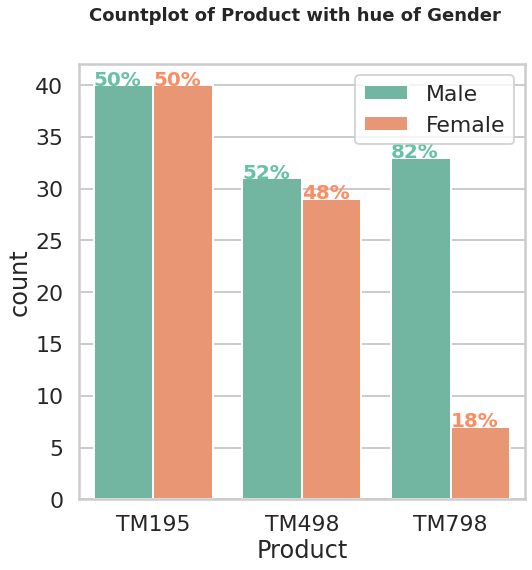

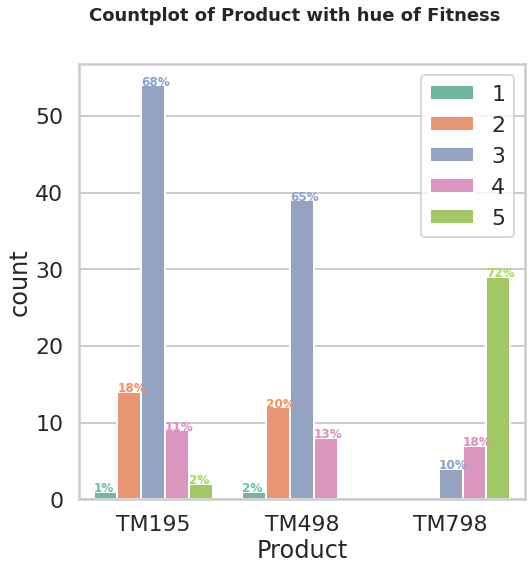

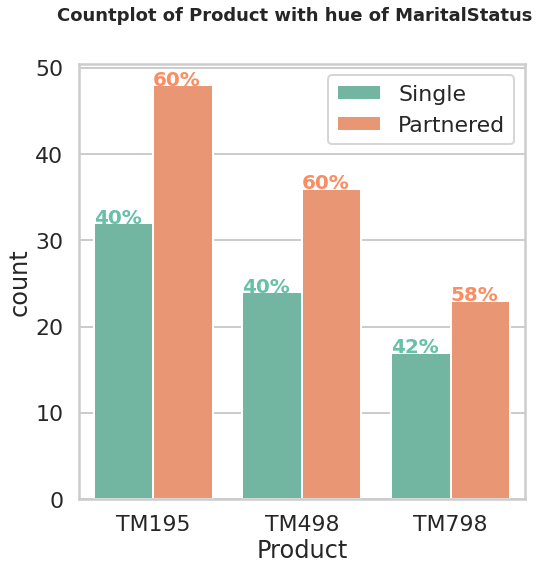

In [19]:
# Visually show proportion & count of customers for each PRODUCT under unique categorical values
def plot_countplots_model(data, var, hue, fs):
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    sns.countplot(data=data, x=var, hue=hue, ax=ax, palette='Set2')
    plt.suptitle(f'Countplot of {var} with hue of {hue}', fontweight='heavy', fontsize=18)
    ax.legend(loc='best')
    
    
    Number_of_categories = data[var].nunique()
    hue_categories = data[hue].nunique()    
    colors = sns.color_palette('Set2')[:hue_categories]
    
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = data[var].value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.0f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() 
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = fs, **dict(alpha=1),color = colors[j], fontweight='bold')
# Visually show proportion & count of customers for each PRODUCT under unique GENDER values    
plot_countplots_model(cardio, 'Product', 'Gender',20)
# Visually show proportion & count of customers for each PRODUCT under unique FITNESS values
plot_countplots_model(cardio, 'Product', 'Fitness',12)
# Visually show proportion & count of customers for each PRODUCT under unique MARITALSTATUS values
plot_countplots_model(cardio, 'Product', 'MaritalStatus',20)

> **Observations**

> Some interesting observations can be drawn from the simple bivariate analysis of `Product` with `Gender`, `Fitness` and `MaritalStatus`
> - `Product` TM195 and TM498 have almost equally gender diverse customer base. But men are the dominant customer of the `Product` TM798 
>    - This is indicating that in customers interested in buying TM798 are predominatly male

> - Again a similar pattern arises for Product #s TM195 and TM498 in terms of `Fitness` level of the customers, where they rate themselves *\~3* on an average. Whereas, the TM798 customers rate themselves much higher 
(*\~4.6*)
>    - The high `Fitness` level indicates that the TM798 is a product for more advanced user.

> - The `MaritalStatus` of the customer seems to stay in similar proportions across all products

- **Bivariate analysis of Product with numerical variables and categorical values in hue**

In [22]:
# This function display bivariate analysis numbers and shows following plots for bivariate analysis of 
# numerical variable with categorical variables
#
# 1. 3 sets of barplots which show the means with a categorical variables (GENDER, MARITALSTATUS & FITNESS) 
#    as hue overlayed over the overall mean for the PRODUCT. Also, the strip plot is plotted over these barplots.
#
# 2. 2 sets of split violin plots with categorical variables (GENDER & MARITALSTATUS) as hue, with an overlay of 
#    strip plot
# 
# 3. 1 plot of 2D kde contour of the numerical variable against FITNESS and overlaid on top is the scatter plot
#    which shows the data points

def describe_product_numvar(numvar):
    
    catvars = ['Gender', 'MaritalStatus', 'Fitness']
    
    print(f'Description of Products w.r.t {numvar} and categorical variables')
    
    # Display the PRODUCT specific mean and median of the numerical variables
    print('\n\n')    
    print(cardio.groupby(['Product'])[numvar].agg(['mean','median']).round(1))
    
    # Display PRODUCT specific and categorical variable based mean, median and count
    for catvar in catvars:
        print('\n\n')
        print(cardio.groupby(['Product',catvar])[numvar].agg(['mean','median','count']).round(1))        
    
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24,8))
    fig.tight_layout(pad=3.0)
    plt.suptitle(f'Mean barplot of {numvar} w.r.t Products', fontweight='heavy', fontsize=24)
    
    # Plot # 1
    for i, var in enumerate(catvars):
        
        # Barplot with hue
        sns.barplot(data=cardio, x='Product', y=numvar, hue=var, palette='Set2',
                    estimator=np.mean, ax=ax[i],**({'alpha':1}))
        # Barplot without hue
        sns.barplot(data=cardio, x='Product', y=numvar, ax=ax[i], ci=None,
                    **({'fill':False,'edgecolor':'k','linestyle':'--','label':'Product mean'}))
        # Add the data points as stripplot
        sns.stripplot(data=cardio, x ='Product', y=numvar, hue=var, 
                      jitter=True, ax=ax[i], dodge=True, edgecolor='black',
                      alpha=0.3, linewidth=1,
                      size=8, palette='Set2')
        # modify legend to list the quantities of interest
        handles, labels = ax[i].get_legend_handles_labels()
        ax[i].legend(handles[cardio[var].nunique():], labels[cardio[var].nunique():], 
                     fontsize=15, loc='best',framealpha=0.2)
        ax[i].title.set_text(var)
        
        
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
    fig.tight_layout(pad=3.0)
    
    # Plot # 2
    for i, var in enumerate(catvars[:2]):
        
        # Plot the split violinplot
        sns.violinplot(data=cardio, x="Product", y=numvar, 
                       hue=var, split=True, inner="quart", 
                       linewidth=2,ax=ax[i],palette='Set2')
        # PLot the data as stripplot
        sns.stripplot(data=cardio, x ='Product', y=numvar, hue=var, 
                      jitter=True, ax=ax[i], dodge=True, edgecolor='black',
                      alpha=0.3, linewidth=1,
                      size=8, palette='Set2')
        # modify the legend to list the quantities of interest
        handles, labels = ax[i].get_legend_handles_labels()
        ax[i].legend(handles[0:cardio[var].nunique()], labels[0:cardio[var].nunique()], 
                     fontsize=15, loc='upper left',framealpha=0.2)
        ax[i].title.set_text(var)
        
        
    # Plot # 3    
    # Plot the 2D kde contour
    ax = sns.displot(data=cardio, x="Fitness", y=numvar, hue='Product',palette='Set2',
                     kind='kde', height=8, levels=2, fill = False)
    # Plot the data points as scatter plot
    sns.scatterplot(data=cardio, x="Fitness", y=numvar, hue='Product',
                    legend=False, alpha = 0.4, edgecolor='k', palette='Set2',
                    linewidth = 0.5, style='Product')
    # modify the legend to list the quantities of interest
    sns.move_legend(ax, loc = 'lower left', bbox_to_anchor=(.2, .7),
                    fontsize=20, frameon=True)
    ax.set_yticklabels(rotation=45, fontsize=20)

Description of Products w.r.t Income and categorical variables



            mean   median
Product                  
TM195    46418.0  46617.0
TM498    48973.6  49459.5
TM798    75441.6  76568.5



                   mean   median  count
Product Gender                         
TM195   Female  46020.1  46048.5     40
        Male    46816.0  46617.0     40
TM498   Female  49336.4  48891.0     29
        Male    48634.3  50028.0     31
TM798   Female  73633.9  69721.0      7
        Male    75825.0  77191.0     33



                          mean   median  count
Product MaritalStatus                         
TM195   Partnered      47848.8  46617.0     48
        Single         44271.9  43774.5     32
TM498   Partnered      49522.7  51165.0     36
        Single         48150.1  47185.5     24
TM798   Partnered      82047.2  85906.0     23
        Single         66504.6  58516.0     17



                    mean   median  count
Product Fitness                         
TM195   1        

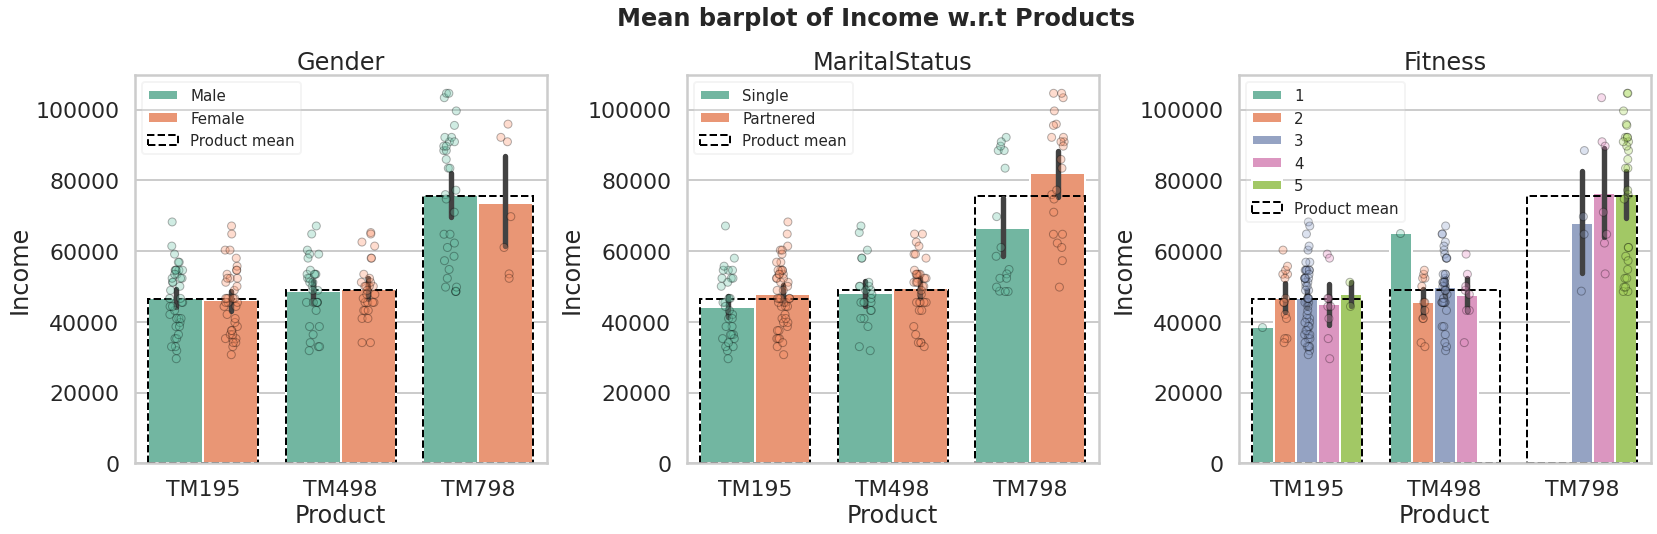

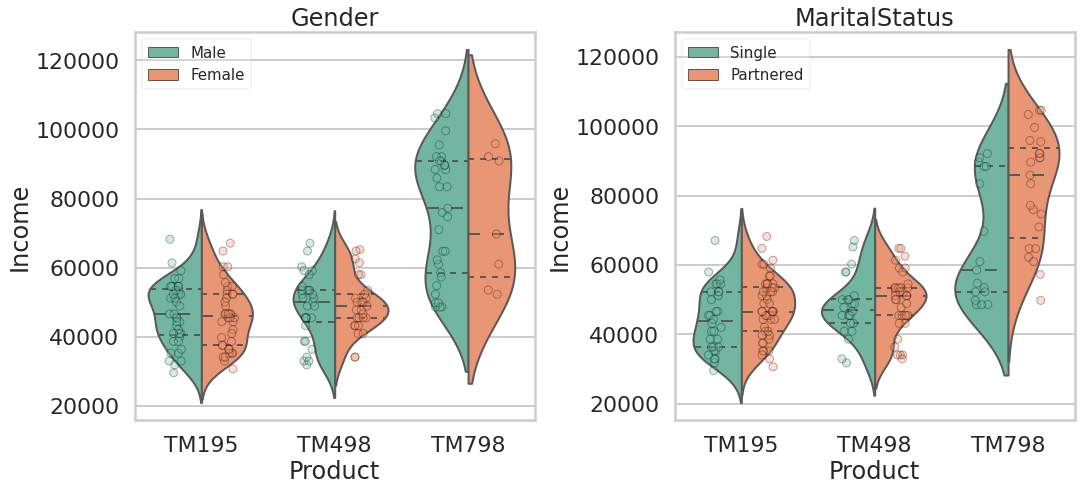

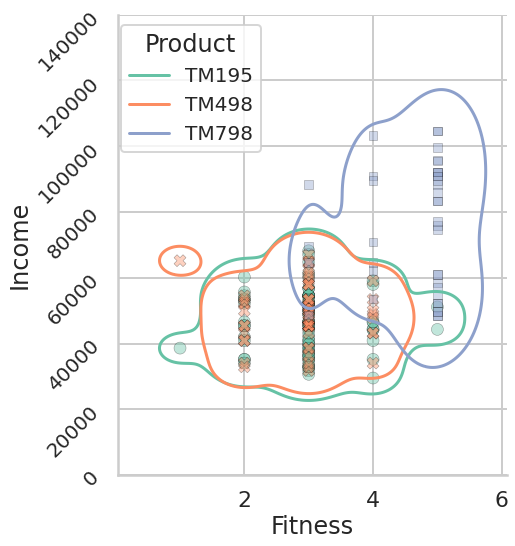

In [21]:
# Display the details and plots of the bivariate analysis of INCOME with PRODUCT and hue from 
# categorical variables (GENDER, MARITALSTATUS & FITNESS)
describe_product_numvar('Income')

> **Observations**

> Some interesting observations can be drawn from the bivariate analysis of `Product` with `Income`
> - `Product`s TM195 and TM498 are bought by customers in a similar `Income` group (30k - 70k). But customer of the `Product` TM798 belong in a much higher income group (50k - 100k)
> - `Gender`wise there is a smaller representation of women in the customer group of `Product` TM798
> - `MaritalStatus`wise partnered customers are dominant in the customer across all `Product`s and have higher `Income`s compared to single customers as well. 
> - `Fitness` level of customers in `Income` group (30k - 70k) is predominatly \~3 and prefer `Product` TM195 and TM498. 
> - For `Product` TM798 the average `Fitness` level is high as well as they belong in a higher `Income` group (50k - 100k)
> - Majority of TM798 customers have higher `Fitness` level as well as higher `Income`

Description of Products w.r.t Age and categorical variables



         mean  median
Product              
TM195    28.6    26.0
TM498    28.9    26.0
TM798    29.1    27.0



                mean  median  count
Product Gender                     
TM195   Female  28.4    26.5     40
        Male    28.6    26.0     40
TM498   Female  29.1    29.0     29
        Male    28.7    25.0     31
TM798   Female  27.0    26.0      7
        Male    29.5    27.0     33



                       mean  median  count
Product MaritalStatus                     
TM195   Partnered      29.7    27.5     48
        Single         26.9    25.0     32
TM498   Partnered      30.2    31.0     36
        Single         26.9    25.0     24
TM798   Partnered      29.8    28.0     23
        Single         28.1    24.0     17



                 mean  median  count
Product Fitness                     
TM195   1        23.0    23.0      1
        2        28.3    26.5     14
        3        28.6    26.5     54
 

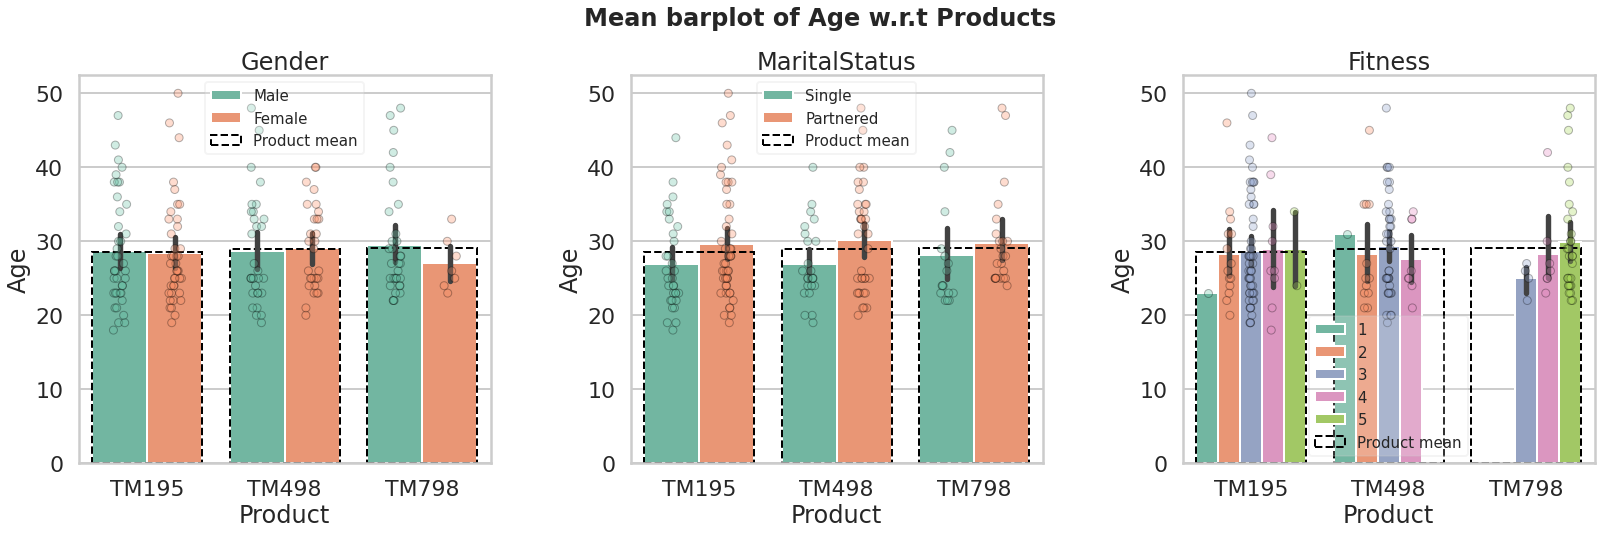

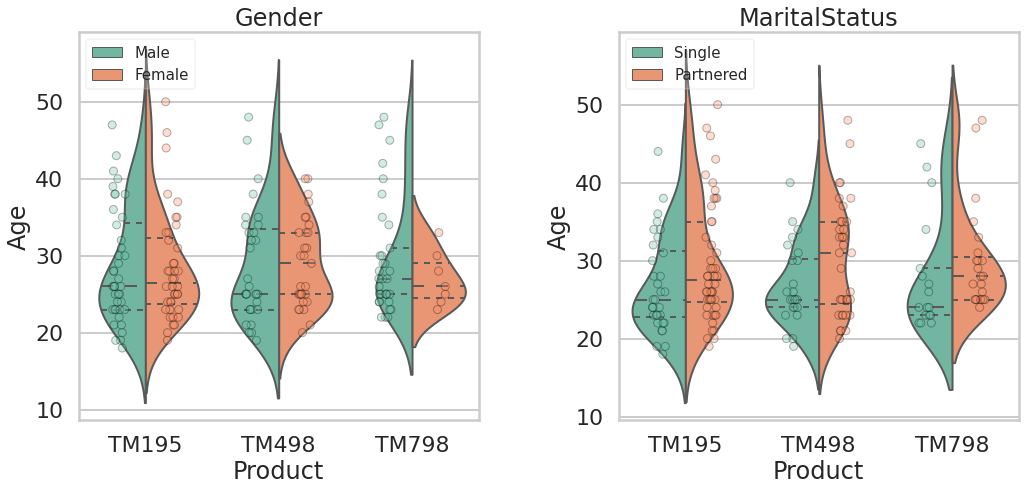

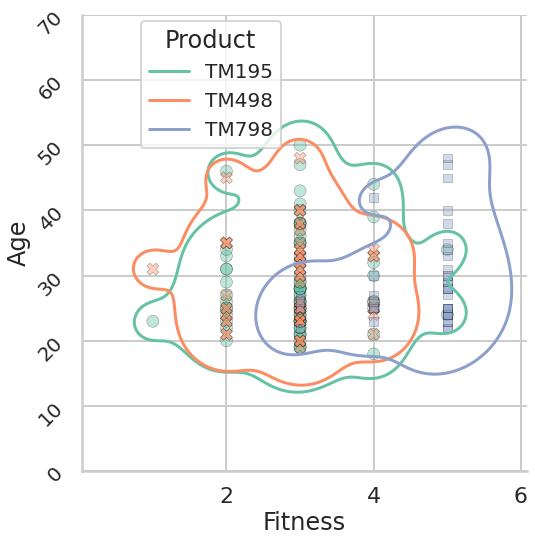

In [25]:
# Display the details and plots of the bivariate analysis of AGE with PRODUCT and hue from 
# categorical variables (GENDER, MARITALSTATUS & FITNESS)
describe_product_numvar('Age')

> **Observations**

> Some interesting observations can be drawn from the bivariate analysis of `Product` with `Age`
> - The average `Age` of cutomers of all the `Product`s is between (28 - 29).
> - For `Product` TM798, the females are much younger than males.
> - Partnered customers have higher `Age` compared to single customers across all `Products`
> - A majority number of customers of TM798 who have a really high `Fitness` level (5/5) are also relatively older.

Description of Products w.r.t Education and categorical variables



         mean  median
Product              
TM195    15.0    16.0
TM498    15.1    16.0
TM798    17.3    18.0



                mean  median  count
Product Gender                     
TM195   Female  15.1    15.5     40
        Male    15.0    16.0     40
TM498   Female  15.2    16.0     29
        Male    15.0    16.0     31
TM798   Female  17.9    18.0      7
        Male    17.2    18.0     33



                       mean  median  count
Product MaritalStatus                     
TM195   Partnered      15.1    16.0     48
        Single         14.9    15.0     32
TM498   Partnered      15.2    16.0     36
        Single         14.9    14.0     24
TM798   Partnered      17.4    18.0     23
        Single         17.2    16.0     17



                 mean  median  count
Product Fitness                     
TM195   1        16.0    16.0      1
        2        14.6    14.0     14
        3        15.1    16.0   

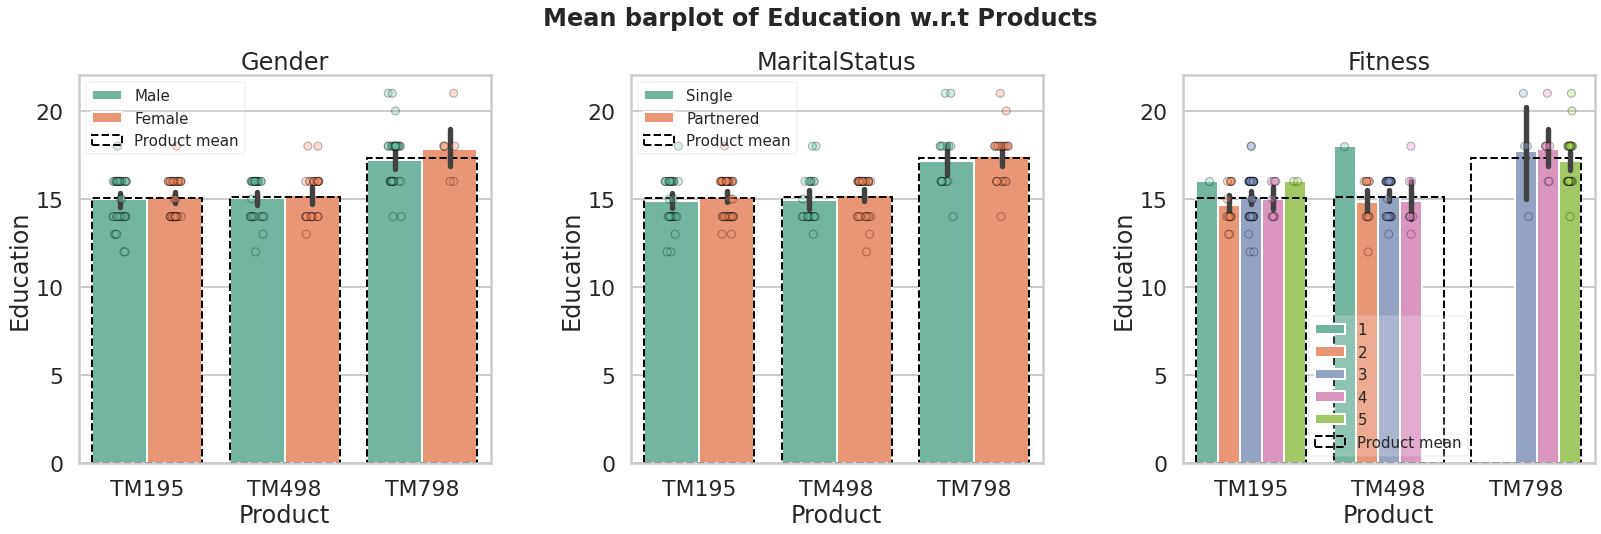

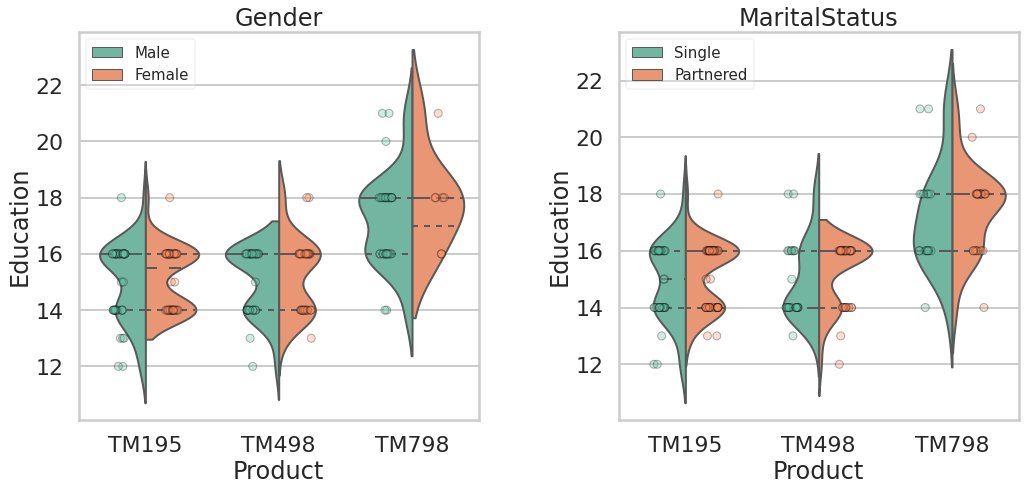

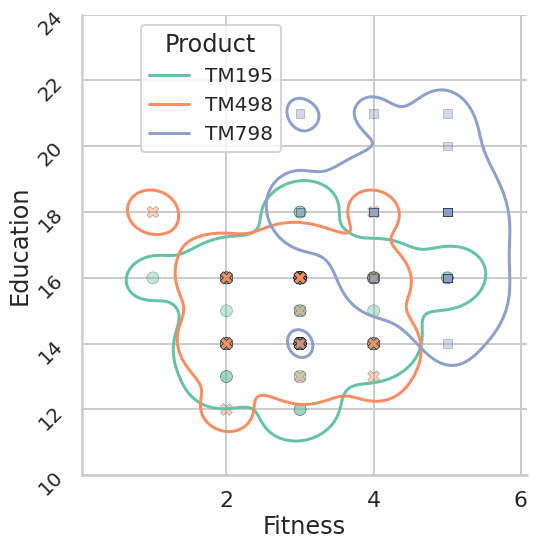

In [26]:
# Display the details and plots of the bivariate analysis of EDUCATION with PRODUCT and hue from 
# categorical variables (GENDER, MARITALSTATUS & FITNESS)
describe_product_numvar('Education')

> **Observations**

> Some interesting observations can be drawn from the bivariate analysis of `Product` with `Education`
> - The average `Education` of cutomers of `Product` TM798 is higher than the customers of other product by \~2 years, indicating that they have a graduate degree.
> - Partnered customers have a slightly longer `Education` than single users.
> - There is a slight positive correlation between `Education` and `Fitness` level of the customers.

Description of Products w.r.t Usage and categorical variables



         mean  median
Product              
TM195     3.1     3.0
TM498     3.1     3.0
TM798     4.8     5.0



                mean  median  count
Product Gender                     
TM195   Female   2.9     3.0     40
        Male     3.3     3.0     40
TM498   Female   3.1     3.0     29
        Male     3.0     3.0     31
TM798   Female   5.0     5.0      7
        Male     4.7     4.0     33



                       mean  median  count
Product MaritalStatus                     
TM195   Partnered       3.0     3.0     48
        Single          3.2     3.0     32
TM498   Partnered       3.1     3.0     36
        Single          3.1     3.0     24
TM798   Partnered       4.9     5.0     23
        Single          4.6     5.0     17



                 mean  median  count
Product Fitness                     
TM195   1         3.0     3.0      1
        2         2.4     2.0     14
        3         3.1     3.0     54

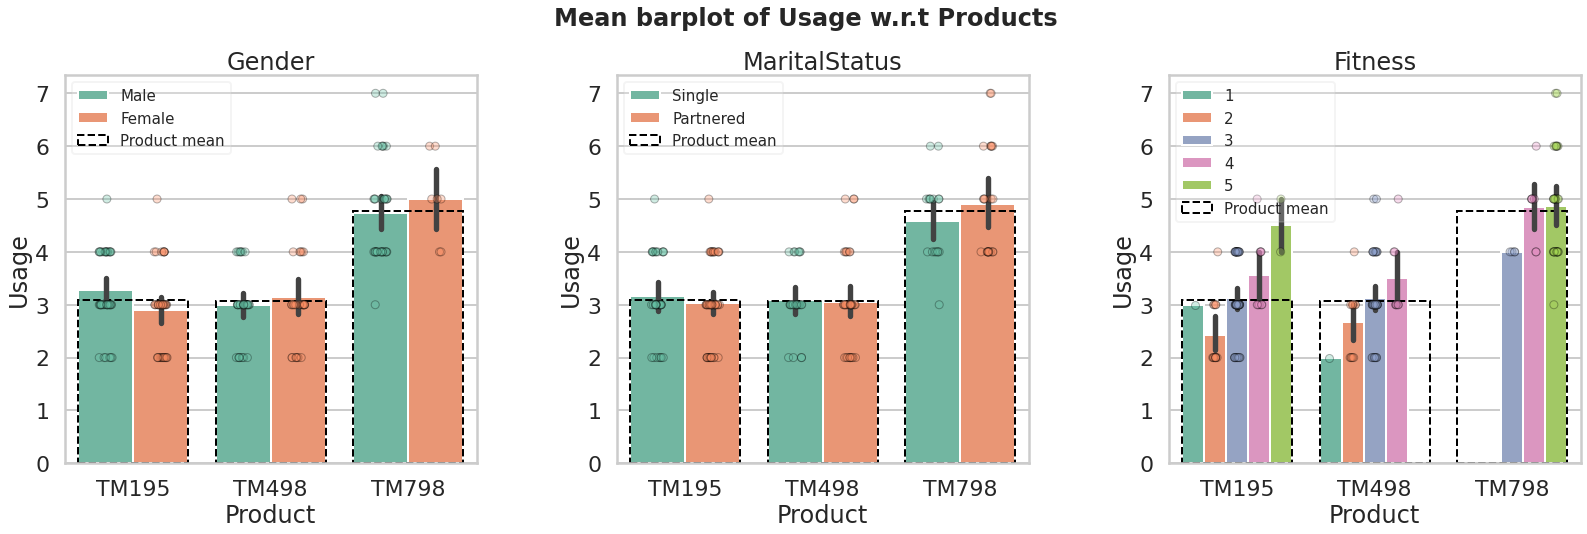

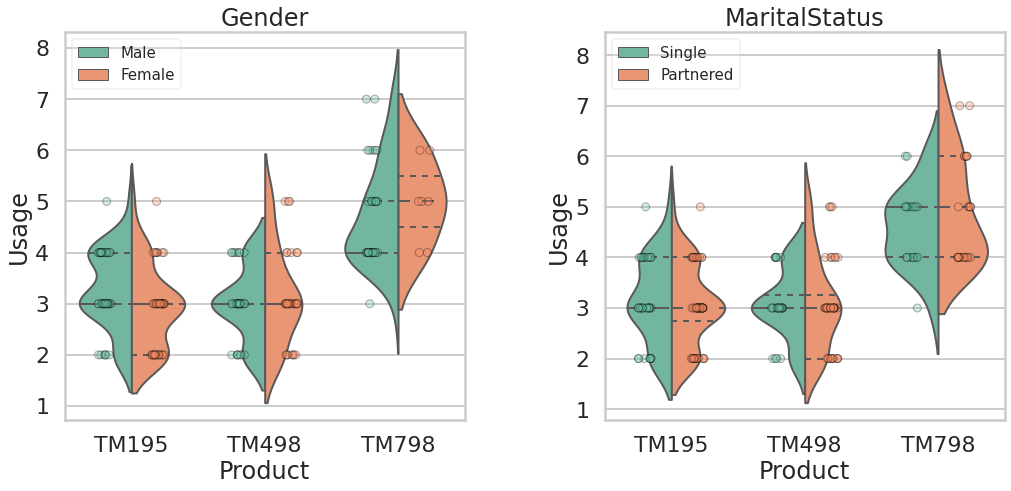

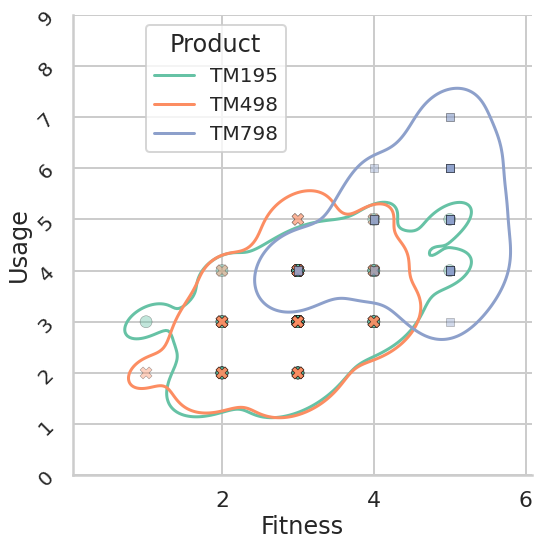

In [27]:
# Display the details and plots of the bivariate analysis of USAGE with PRODUCT and hue from 
# categorical variables (GENDER, MARITALSTATUS & FITNESS)
describe_product_numvar('Usage')

> **Observations**

> Some interesting observations can be drawn from the bivariate analysis of `Product` with `Usage`
> - The average `Usage` of `Product` TM798 is higher than the `Usage` of TM195 and TM498. The higher `Usage` of TM798 along with the higher `Fitness` level of its customer indicate that they are more advanced.
> - There is a positive correlation between `Usage` and `Fitness` level of users. TM798 customers are on the higher end of that correlation whereas the customers of TM195 and TM498 are on the lower end.

Description of Products w.r.t Miles and categorical variables



          mean  median
Product               
TM195     82.8    85.0
TM498     87.9    85.0
TM798    166.9   160.0



                 mean  median  count
Product Gender                      
TM195   Female   76.2    75.0     40
        Male     89.4    85.0     40
TM498   Female   87.3    85.0     29
        Male     88.5    95.0     31
TM798   Female  180.0   200.0      7
        Male    164.1   160.0     33



                        mean  median  count
Product MaritalStatus                      
TM195   Partnered       77.2    75.0     48
        Single          91.1    85.0     32
TM498   Partnered       90.1    85.0     36
        Single          84.8    85.0     24
TM798   Partnered      183.0   180.0     23
        Single         145.1   150.0     17



                  mean  median  count
Product Fitness                      
TM195   1         47.0    47.0      1
        2         49.1    47.0     14
        3  

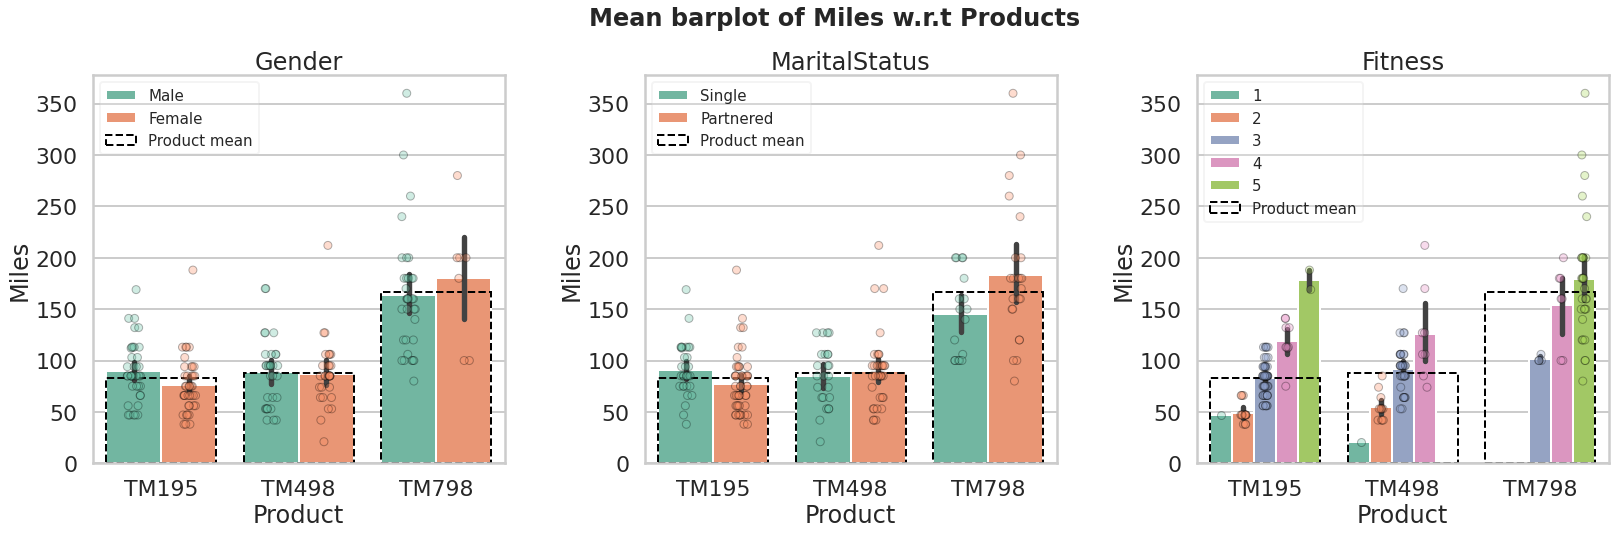

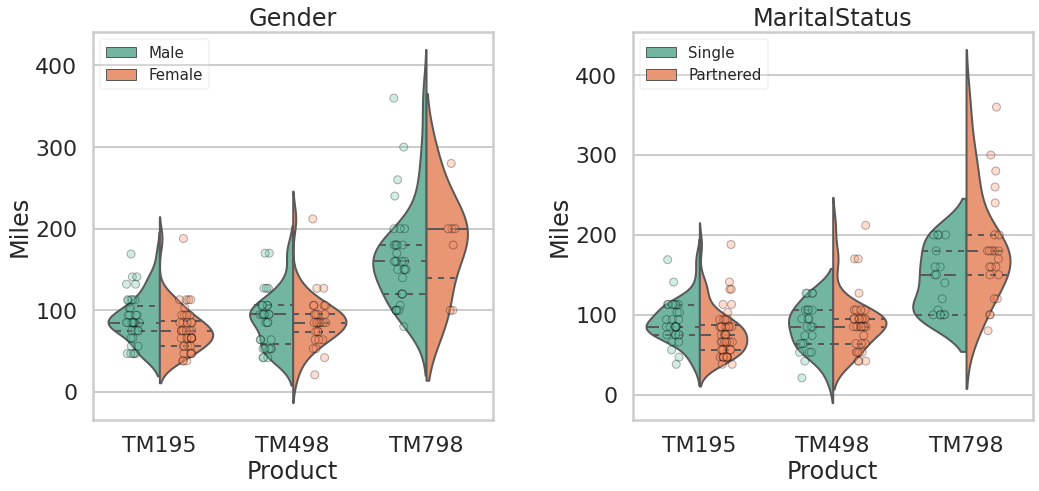

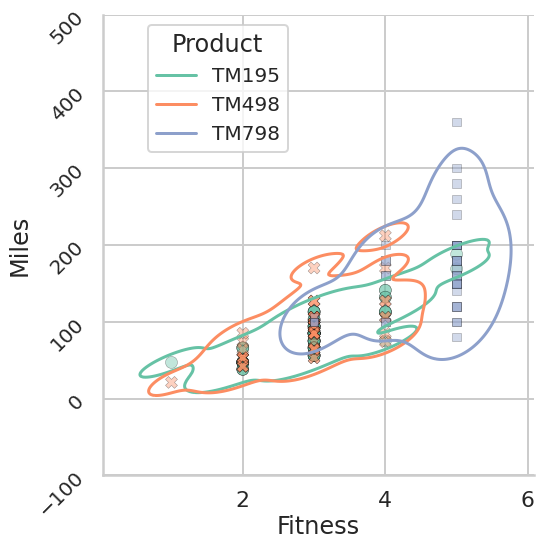

In [28]:
describe_product_numvar('Miles')

> **Observations**

> Some interesting observations can be drawn from the bivariate analysis of `Product` with `Miles`
> - The average `Miles` of `Product` TM798 is much higher than the `Miles` of TM195 and TM498. 
> - The partnered customers of TM798 put on much more miles compared to single customers
> - There is a strong positive correlation between `Miles` and `Fitness` level of customers. TM798 customers are on the higher end of that correlation whereas the customers of TM195 and TM498 are on the lower end.

- **Correlation analysis of numerical variables**

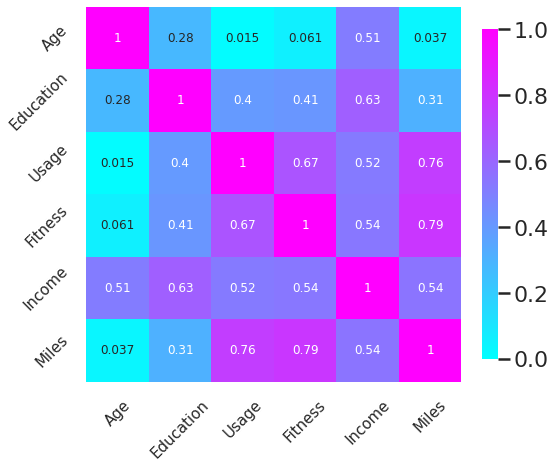

In [30]:
# Show the coorelation of numerical values on a color coded matrix
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
fig.tight_layout(pad=2.0)

corr = cardio.corr()
sns.heatmap(corr, annot=True, ax=ax, annot_kws={'fontsize':12}, 
            cmap='cool',vmin=0,  vmax = 1, square=True, cbar_kws={'fraction':0.04})#, mask=matrix)
ax.tick_params(axis='both', rotation = 45, labelsize=15)

In [31]:
# Show the list of correlations sorted with correlation value
upper_corr_mat = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
sorted_mat = upper_corr_mat.unstack().dropna().sort_values(ascending=False)
print(sorted_mat)

Miles      Fitness      0.785702
           Usage        0.759130
Fitness    Usage        0.668606
Income     Education    0.625827
Miles      Income       0.543473
Income     Fitness      0.535005
           Usage        0.519537
           Age          0.513414
Fitness    Education    0.410581
Usage      Education    0.395155
Miles      Education    0.307284
Education  Age          0.280496
Fitness    Age          0.061105
Miles      Age          0.036618
Usage      Age          0.015064
dtype: float64


> **Observations**

> Following observations can be drawn from the correlation analysis of numerical variables:
> - A very strong positive correlation between `Miles`, `Fitness` \& `Usage` (0.79, 0.76 \& 0.67), which makes sense for customers with higher `Fitness` level being able to run longer annual `Miles` which are logically linked to higher `Usage`.
> - A positive correlation is observed for `Income` with `Education` (0.63), `Miles` (0.54), `Fitness` (0.54), `Usage` (0.52) \& `Age` (0.51).
> - The next significant positive correlation is of `Education` with `Fitness` (0.41), `Usage` (0.40), `Miles` (0.31) \& `Age` (0.28).
> - There is no negative correlation between numerical quantities.

- **Plotting linear regression of top 8 correlations of numerical variables**

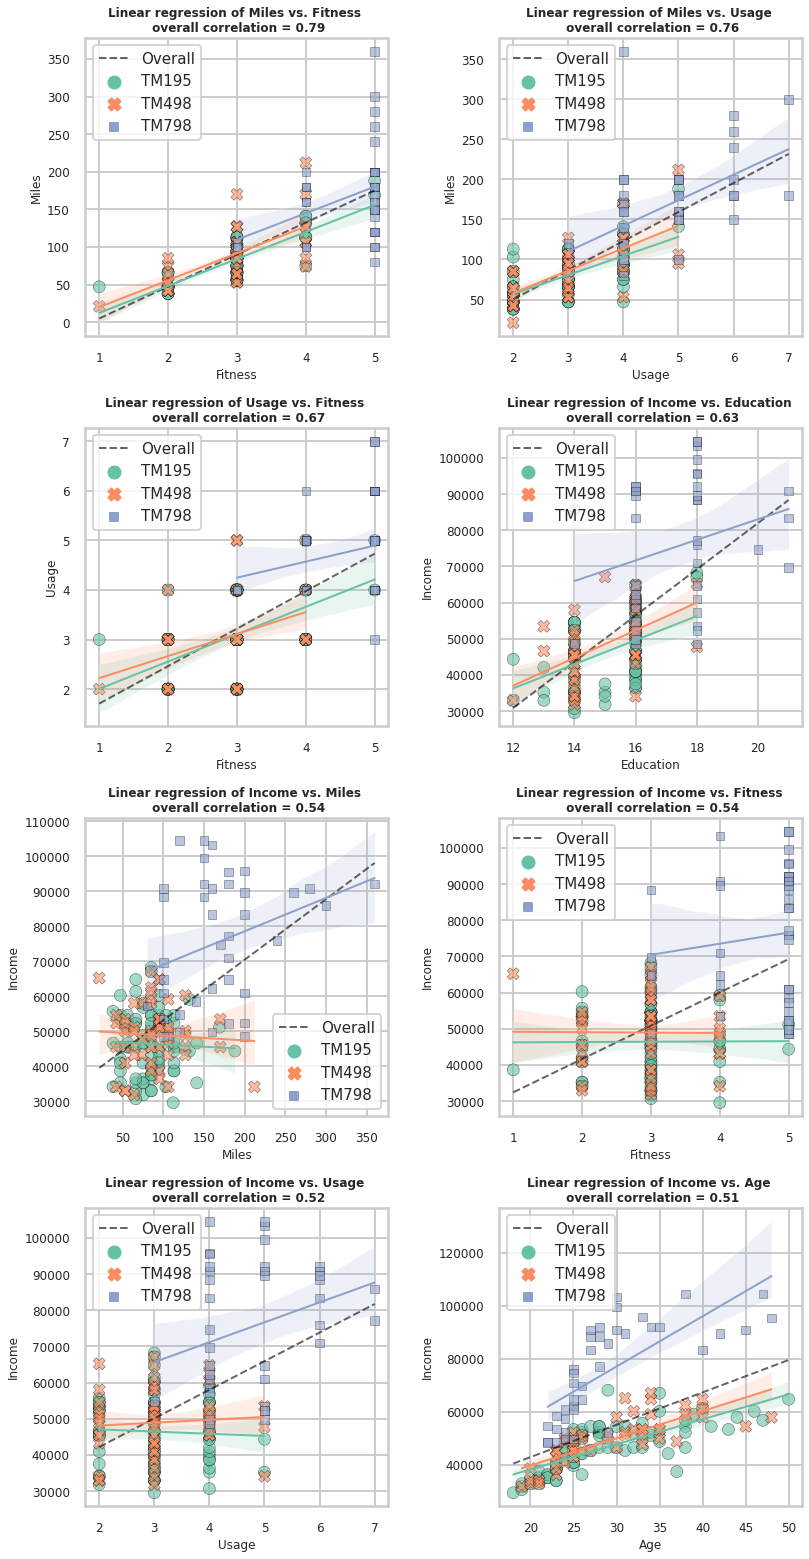

In [33]:
# This funxtion plots the linear regresssion lines along with scatter plots of overall linear fit as well 
# PRODUCT based linear fits too
def plot_linfit_mod(ax,qx,qy):
    palette='Set2'
    # show the all the data points with PRODUCT as hue
    sns.scatterplot(data=cardio, x=qx, y=qy, hue="Product", ax=ax,
                    palette=palette, alpha=0.6, style='Product',
                    edgecolor='k', linewidth = 0.5)
    # Plot the overall linear fit
    sns.regplot(data=cardio, x=qx, y=qy, scatter=False, 
                ax=ax,color='k', line_kws={'linestyle':'--','linewidth':2, 
                                           'alpha':0.6}, 
                ci=None, label='Overall');
    ax.legend(fontsize=15)
    
    # Plot the product wise linear fits
    colors = sns.color_palette(palette)[:cardio.Product.nunique()]
    for i, product in enumerate(cardio.Product.unique()):
        sns.regplot(data=cardio[cardio['Product'] == product], 
                    x=qx, y=qy, scatter=False, 
                    ax=ax, color=colors[i], line_kws={'linewidth':2});
    ax.set_title(f'Linear regression of {qy} vs. {qx} \n overall correlation = {corr[qx][qy]:.2f}', 
                 fontsize=12, fontweight='heavy')
    ax.tick_params(axis='both', labelsize=12)
    ax.xaxis.label.set_size(12)
    ax.yaxis.label.set_size(12)

# Show the linear regression of top 8 correlations
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(12,22))
fig.tight_layout(pad=1.5,h_pad=2)
axs = axs.ravel()
variableList = np.concatenate(([['Fitness','Usage','Fitness','Education','Miles','Fitness','Usage','Age']],
                               [['Miles','Miles','Usage','Income','Income','Income','Income','Income']]),
                              axis=0).T
for i,ax in enumerate(axs):
    plot_linfit_mod(ax,variableList[i,0], variableList[i,1])

> **Observations**

> Following observations can be drawn from the linear regression of `Fitness`, `Usage` \& `Miles` along with `Proudct` as hue:
> - In comparison to overall linear regression between `Fitness`, `Usage` \& `Miles` the individual regression for each `Product` follows similar linear regression as well.
> - As shown earlier, the users of TM798 are on the higher end of the `Fitness`, `Usage`\& `Miles`.


> Following observations can be drawn from the linear regression of `Income` with `Education`, `Miles`, `Fitness`, `Usage` \& `Age` along with `Proudct` as hue:
> - An overall postive correlation is observed for `Income` with `Education` \& `Age`. This positive correlation is also observed across all the `Product`s.
> - An overall postive correlation is observed for `Income` with `Miles`, `Fitness` \& `Usage`. This positive correlation is although not observed across all the `Product`s. It is only observed for TM798.

- **Multivariate Analysis with `Gender` and `MaritalStatus` as hues**

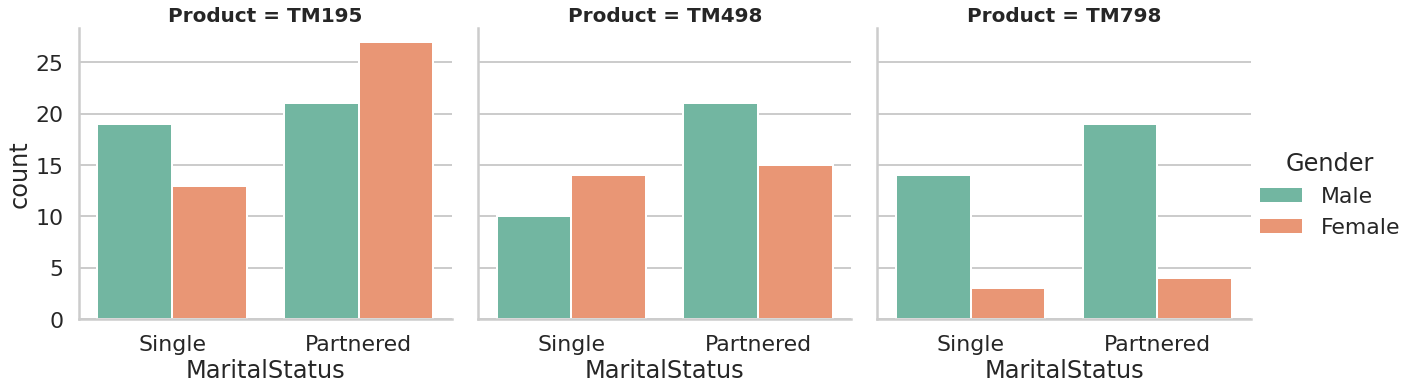

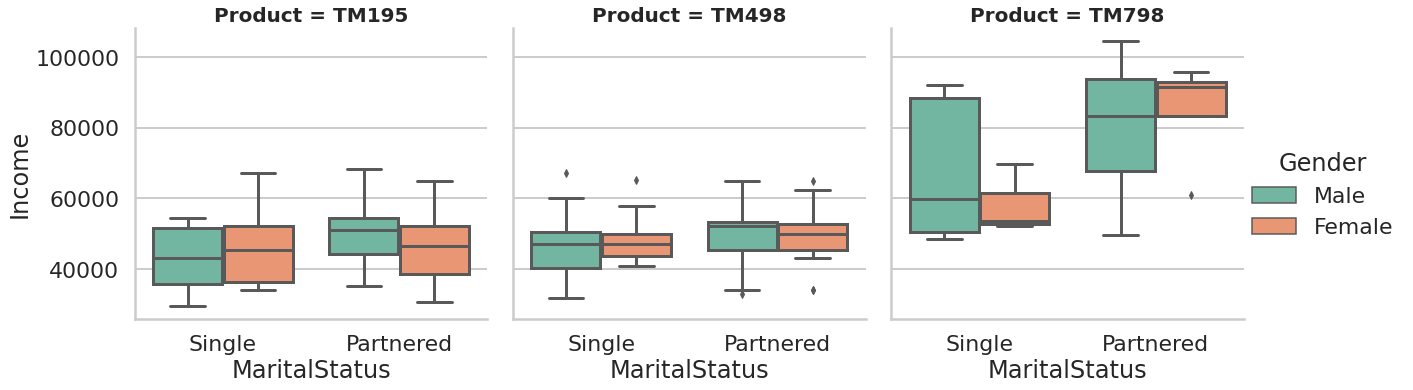

In [35]:
# Show series of countplots with varying PRODUCTs and for each PRODUCT show the GENDER and MARITALSTATUS 
# based distribution
ax = sns.catplot(data=cardio, x='MaritalStatus', kind='count', hue='Gender', 
                 col='Product', palette='Set2', height=6);
ax.set_titles(size=20, fontweight='heavy');

# Show series of boxplots with varying PRODUCTs and for each PRODUCT show the GENDER and MARITALSTATUS 
# based distribution of INCOME
ax = sns.catplot(data=cardio, x='MaritalStatus', y='Income', kind='box', hue='Gender', dodge=True,
                 col='Product', palette='Set2', height=6);
ax.set_titles(size=20, fontweight='heavy');

> **Observations**

> Following observations can be drawn from the `Gender` \& `MaritalStatus` based analysis of `Product`s:
> - For TM195, females are the dominant among partenred customer segment, whereas males are dominant customers in single customer segment
> - For TM498, males are the dominant among partenred customer segment, whereas females are dominant customers in single customer segment
> - For TM798, males are the dominant across both `MaritalStatus` customer segments
>   - The single female customer group of TM798 have similar `Income` distiribution as female customers of TM195 \& TM498.
>   - The partnered female customer are in a higher `Income` group then females of any other segment of all the `Product`s.

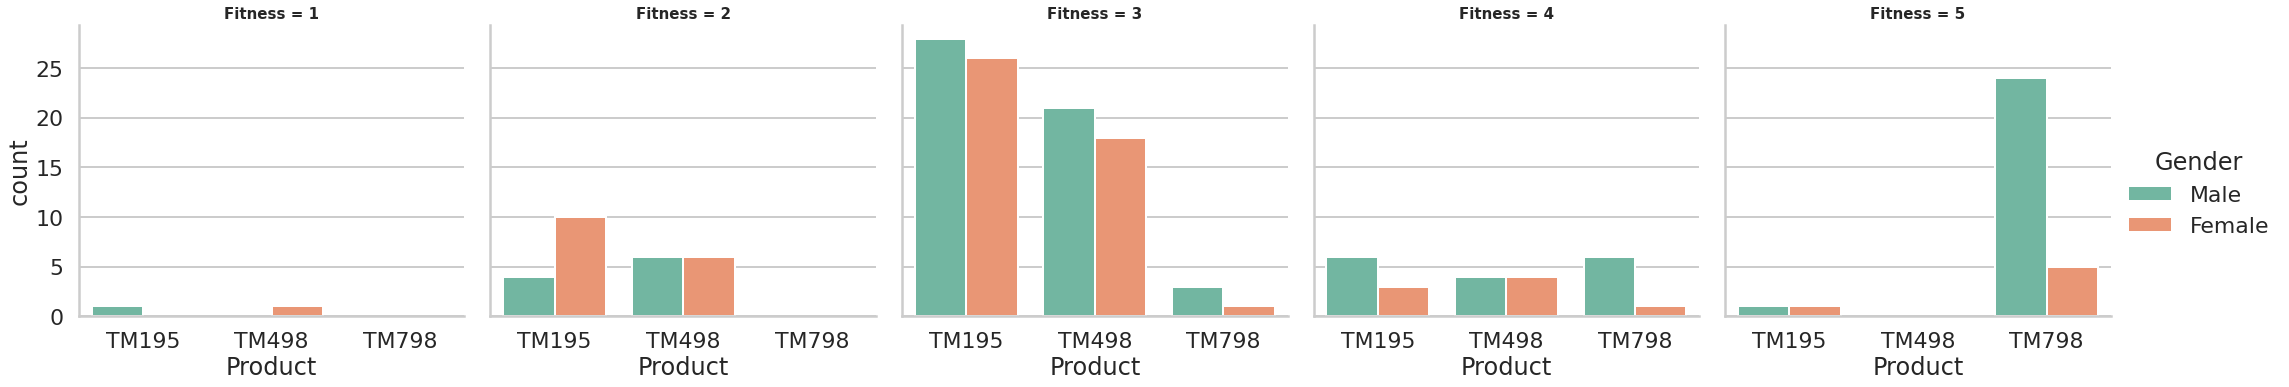

In [37]:
# Show series of countplots with varying FITNESS and for each FITNESS level show the GENDER and PRODUCT
# based distribution
ax = sns.catplot(data=cardio, x='Product', kind='count', col='Fitness', 
                 hue='Gender', palette='Set2', height=6)
ax.set_titles(size=15, fontweight='heavy');

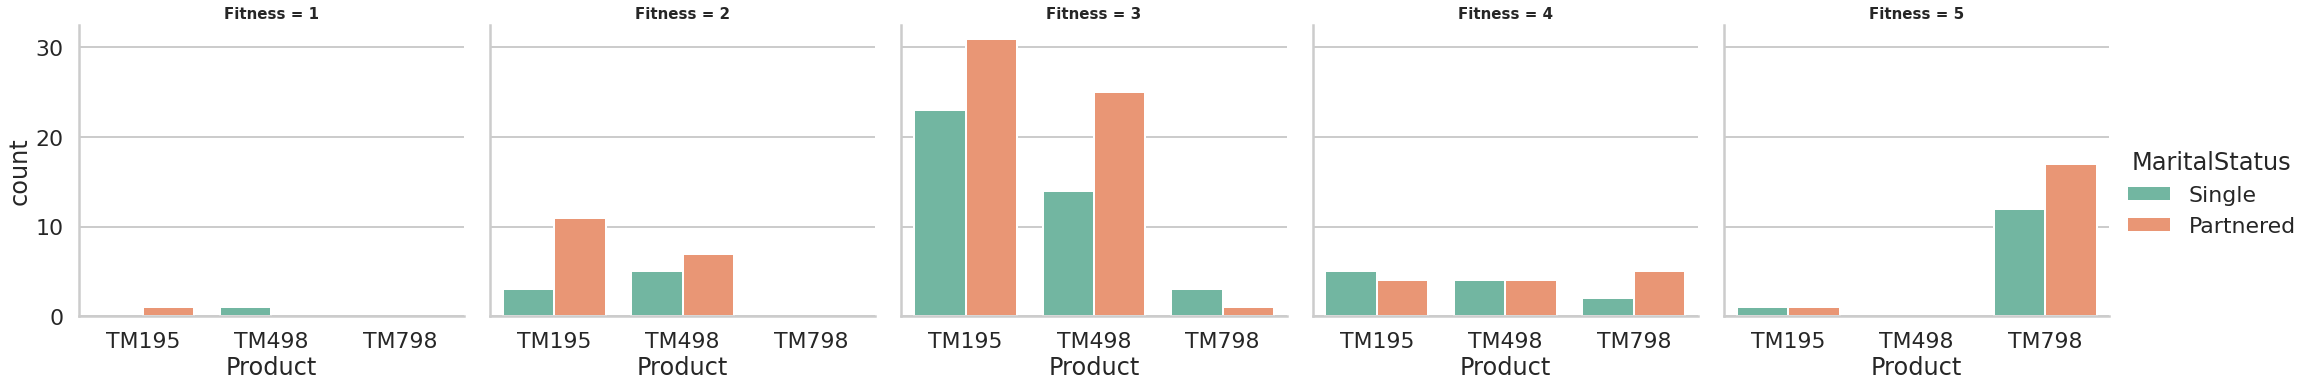

In [39]:
# Show series of countplots with varying FITNESS and for each FITNESS level show the GENDER and MARITALSTATUS
# based distribution
ax = sns.catplot(data=cardio, x='Product', kind='count', col='Fitness', 
                 hue='MaritalStatus', palette='Set2', height=6)
ax.set_titles(size=15, fontweight='heavy');

> **Observations**

> Following observations can be drawn from the `Fitness` based analysis of `Product`s:
> - Customers with `Fitness` level 3 buy TM498. This group of customers is dominated by males and are partenered.
> - Customers with `Fitness` level 5 buy TM798. This group of customers is dominated by males and are partenered.